# Clean Your Data

Data cleaning is a fundamental first step in any ML or AI project. In this noteobok, we step you through the state-of-the-art approaches to data cleaning. The issues we address are as follows:
* Standardize empty values
* Duplicate records
* Highly missing fields
* Missing value imputation
* Redundant fields
* Overly high float precision
* Field level outliers
* Constant fields
* Record level outliers

## Install necessary modules

In [ ]:
!pip install category_encoders

In [ ]:
!pip install missingpy

## Read in a sample dataset and which has some problematic data fields

In [1]:
import pandas as pd
data = pd.read_csv("https://gretel-blueprints-pub.s3.us-west-2.amazonaws.com/data_cleaning/messy_data.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col1,dummy_col2,dummy_col3,0
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,NaN,0.0,0.12345,NaN
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN


## Standardize empty values
* Missing values can be respresented by a variety of fields such as "?", "Missing", N/A, Not applicable
* Standardize all these values to be np.nan. This will simplify the imputing of missing values

In [2]:
import numpy as np
data['workclass'] = np.where(data['workclass']=='?',np.nan, data['workclass']) 
data['occupation'] = np.where(data['occupation']=='?',np.nan, data['occupation']) 
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col1,dummy_col2,dummy_col3,0
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,NaN,0.0,0.12345,NaN
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN


## Duplicated records

In [3]:
# First show the duplicated lines
# Selecting duplicate rows except first occurrence based on all columns 

duplicate = data[data.duplicated()] 
print("Duplicate Rows :") 
duplicate 

Duplicate Rows :


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col1,dummy_col2,dummy_col3,0
8453,25.0,Private,308144.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,Mexico,0.0,NaN,0.0,0.12345,NaN
8645,90.0,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,0.0,NaN,0.0,0.12345,NaN
12202,21.0,Private,250051.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,10.0,United-States,0.0,NaN,0.0,0.12345,NaN
14346,20.0,Private,107658.0,Some-college,10.0,Never-married,Tech-support,Not-in-family,White,Female,0.0,0.0,10.0,United-States,0.0,NaN,0.0,0.12345,NaN
15603,25.0,Private,195994.0,1st-4th,2.0,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,Guatemala,0.0,NaN,0.0,0.12345,NaN
19067,46.0,Private,173243.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
20388,30.0,Private,144593.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,40.0,?,0.0,NaN,0.0,0.12345,NaN
20507,19.0,Private,97261.0,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
22783,19.0,Private,138153.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,10.0,United-States,0.0,NaN,0.0,0.12345,NaN
22934,19.0,Private,146679.0,Some-college,10.0,Never-married,Exec-managerial,Own-child,Black,Male,0.0,0.0,30.0,United-States,0.0,NaN,0.0,0.12345,NaN


In [4]:
# If you think the duplicated records are in error, drop all but the first occurance

data = data.drop_duplicates().reset_index(drop=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col1,dummy_col2,dummy_col3,0
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,NaN,0.0,0.12345,NaN
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,NaN,0.0,0.12345,NaN


## Highly missing fields
* Consider dropping columns with 60% or more missing data

In [5]:
# Show percent missing
df_len = len(data)
data.isnull().sum()/df_len

age               0.000399
workclass         0.056823
fnlwgt            0.000399
education         0.000399
education.num     0.003471
marital.status    0.000399
occupation        0.057069
relationship      0.000399
race              0.000399
sex               0.000399
capital.gain      0.000399
capital.loss      0.000399
hours.per.week    0.000399
native.country    0.000399
income            0.000399
dummy_col1        0.921645
dummy_col2        0.000399
dummy_col3        0.000399
0                 0.999601
dtype: float64

In [6]:
# Note, only dummy_col1 has more than 60% missing
column = "dummy_col1"
data = data.drop([column], axis=1)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,NaN
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12345,NaN
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,NaN
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,NaN
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,NaN


## Missing Value Imputation
* We will use missforest which uses Random Forest to impute a missing value based on the other fields in a record

In [7]:
# Look at missing values across the dataset
data.isnull().sum()

age                  13
workclass          1850
fnlwgt               13
education            13
education.num       113
marital.status       13
occupation         1858
relationship         13
race                 13
sex                  13
capital.gain         13
capital.loss         13
hours.per.week       13
native.country       13
income               13
dummy_col2           13
dummy_col3           13
0                 32544
dtype: int64

In [8]:
# Get the list of nominal columns
nominal_columns = list(data.select_dtypes(include=["object", "category"]).columns)

# Get the indices of the nominal columns
cat = data[data.select_dtypes('object').columns]  
cat_ind = [data.columns.get_loc(c) for c in cat]

# Translate categorical fields to numeric
from sklearn import preprocessing
col_le = {}
data_trans = data.copy()
for col in nominal_columns:
    le = preprocessing.LabelEncoder()
    le.fit(data[col])
    data_trans[col] = le.transform(data[col])
    col_le[col] = le

# Add back in the NaNs
for col in nominal_columns:
    new_values = []
    for i in range(len(data)):
        if pd.isna(data.loc[i][col]):
            new_values.append(np.nan)
        else:
            new_values.append(data_trans.loc[i][col])
    data_trans[col] = new_values
    


In [10]:
# If this cell or the next fails, just repeat running them both
import sklearn
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [11]:
# Run the Random Forest imputation
from missingpy import MissForest
imputer = MissForest()
    
cols = data.columns
data = pd.DataFrame(imputer.fit_transform(data_trans, cat_vars=cat_ind))
data.columns = cols
data.head()

/Users/amy/Documents/venv/lib/python3.9/site-packages/missingpy/missforest.py:475: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  col_modes = mode(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/am

Iteration: 0


/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-pac

Iteration: 1


/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-pac

Iteration: 2


/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-pac

Iteration: 3


/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/amy/Documents/venv/lib/python3.9/site-pac

Iteration: 4


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,3.0,77053.0,11.0,9.0,6.0,11.0,1.0,4.0,0.0,0.0,4356.0,40.0,40.0,0.0,0.0,0.12345,7.0
1,82.0,3.0,132870.0,11.0,9.0,6.0,3.0,1.0,4.0,0.0,0.0,4356.0,18.0,40.0,0.0,0.0,0.12345,7.0
2,66.0,3.0,186061.0,15.0,10.0,6.0,3.0,4.0,2.0,0.0,0.0,4356.0,40.0,40.0,0.0,0.0,0.12345,7.0
3,54.0,3.0,140359.0,5.0,4.0,0.0,6.0,4.0,4.0,0.0,0.0,3900.0,40.0,40.0,0.0,0.0,0.12345,7.0
4,41.0,3.0,264663.0,15.0,10.0,5.0,9.0,3.0,4.0,0.0,0.0,3900.0,40.0,40.0,0.0,0.0,0.12345,7.0


In [12]:
# Translate categorical values back to strings
for col in col_le:
    le = col_le[col]
    data[col] = le.inverse_transform(data[col].astype(int))
    
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,Private,77053.0,HS-grad,9.0,Widowed,Sales,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,?
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12345,?
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,?
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,?
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,?


## Redundant Fields
* When two fields are highly correlated, they are redundant and one of them could be removed

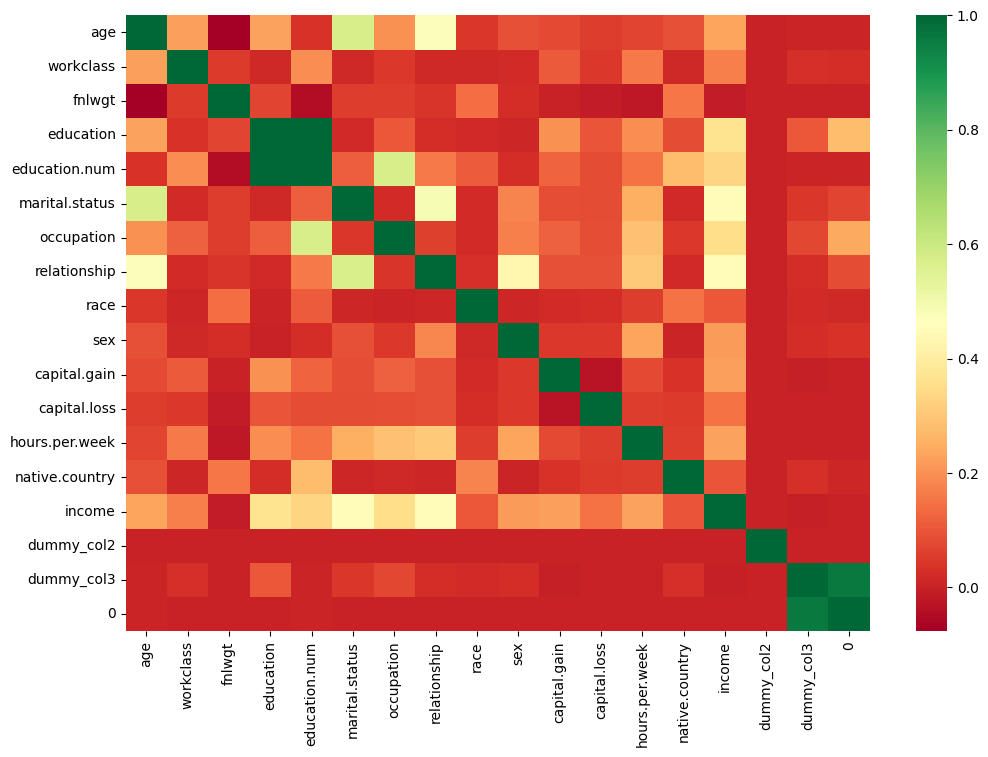

In [13]:
import stats
import matplotlib.pyplot as plt 
import seaborn as sns 

# Compute field correlations
cm = stats.calculate_correlation(data, nominal_columns=nominal_columns)
cm = cm[cm.columns].astype(float)

# Graph the correlations
plt.figure(figsize=(12, 8)) 
sns.heatmap(cm, cmap='RdYlGn')
plt.show()

In [25]:
# Consider removing either education or education.num
data = data.drop(['education'], axis=1)
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3
0,90.0,Private,77053.0,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345
1,82.0,Private,132870.0,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12345
2,66.0,Private,186061.0,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345
3,54.0,Private,140359.0,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345
4,41.0,Private,264663.0,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345


## Overly high float precision
* Decide how much precision on floats you really need to have
* This database only has the added dummy field "dummy_col3" with high precision

In [20]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,Private,77053.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,China
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12345,China
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12345,China
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,China
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12345,China


In [21]:
# Round all floats to precision 2
data = data.round(decimals = 2)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,Private,77053.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12,China
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12,China
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12,China
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12,China
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12,China


## Field level outliers

In [14]:
# Show the numeric columns
for col in data.columns:
    if col not in nominal_columns:
        print(col)

age
fnlwgt
education.num
capital.gain
capital.loss
hours.per.week
income
dummy_col2
dummy_col3


In [15]:
# Pick a column to study outliers 
outlier_column = "age"

{'whiskers': [<matplotlib.lines.Line2D at 0x177f8e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x177f8ee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x177f8e640>],
 'medians': [<matplotlib.lines.Line2D at 0x177fa33a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x177fa3640>],
 'means': []}

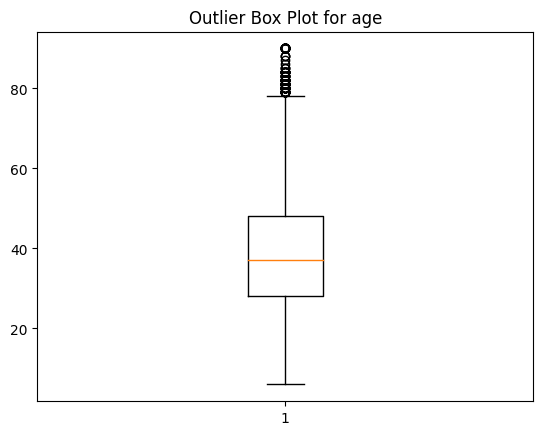

In [16]:
# Plot field level outliers
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Outlier Box Plot for ' + outlier_column)
ax1.boxplot(data[outlier_column])

In [ ]:
# By studying the graph above you can decide which values are outliers
# Consider removing them with the below command
data = data[data["age"] <= 80]

## Consider removing constant columns
* These are typically useless columns when it comes to machine learning

In [80]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
0,90.0,Private,77053.0,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12,0
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0,0.0,0.12,0
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Adm-clerical,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0,0.0,0.12,0
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12,0
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0,0.0,0.12,0


In [17]:
# Print columns with constant values
for col in data.columns:
    vc = data[col].value_counts()
    if len(vc) == 1:
        print("Column " + col + " is a constant column of " + str(vc.index[0]))
    

Column dummy_col2 is a constant column of 0.0


In [34]:
# Drop columns with constant values
col_to_drop = "dummy_col2"
data = data.drop([col_to_drop], axis=1)

## Record level outliers
* First define some functions we need
* Normalize data, then train and score outliers
* "For sure" outliers have a score of .7 or higher
* "Possible" outliers have a score of .6 or higher

In [18]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

def normalize_dataset(df: pd.DataFrame) -> pd.DataFrame:
    # Divide the dataframe into numeric and categorical
    nominal_columns = list(df.select_dtypes(include=["object", "category"]).columns)
    numeric_columns = []
    for c in df.columns:
        if not c in nominal_columns:
            numeric_columns.append(c)
    df_cat = df.reindex(columns=nominal_columns)
    df_num = df.reindex(columns=numeric_columns)
    # Fill missing values and encode categorical columns by the frequency of each value
    if len(numeric_columns) > 0:
        df_num = df_num.fillna(df_num.median())
    if len(nominal_columns) > 0:
        df_cat = df_cat.fillna("Missing")
        encoder = ce.count.CountEncoder()
        df_cat_labels = pd.DataFrame(encoder.fit_transform(df_cat))
    # Merge numeric and categorical back into one dataframe
    new_df = pd.DataFrame()
    if len(nominal_columns) == 0:
        new_df = df_num
    elif len(numeric_columns) == 0:
        new_df = df_cat_labels
    else:
        new_df = pd.concat([df_num, df_cat_labels], axis=1, sort=False)
    # Finally, standardize all values
    all_columns = nominal_columns + numeric_columns
    new_df = pd.DataFrame(StandardScaler().fit_transform(new_df),columns=all_columns)
    return new_df

def train_outlier_model(train_norm:pd.DataFrame):
    outlier_model = IsolationForest()
    outlier_model.fit(train_norm)
    return outlier_model

def scale(scores):
    new_scores = scores * -1 + .5
    return new_scores
    
def score_outlers_df(df_norm:pd.DataFrame, outlier_model):
    scores = outlier_model.decision_function(df_norm)  # outlier scores
    scaled_scores = scale(scores)
    # Save outlier scores and predictions in the passed dataframe
    df_norm["outlier_score"] = scaled_scores
    return df_norm


In [21]:
# Normalize data, train and score outlier model
data_normalize = normalize_dataset(data)
outlier_model = train_outlier_model(data_normalize)
data_norm = score_outlers_df(data_normalize, outlier_model)

In [23]:
# View the for sure outliers (those with a score of .7 or above)
# Change .7 to .6 to view possible outliers
outliers = data.loc[data_norm['outlier_score'] >= .7]
outliers

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,dummy_col2,dummy_col3,0
32554,6.0,non-worklass,171351.0,elementary,1.0,Widowed,student,Other-relative,Asian-Pac-Islander,female,0.0,0.0,0.0,Chia,1.0,0.0,0.12345,?


In [ ]:
# Remove the for sure outliers
data = data.loc[data_norm['outlier_score'] < .7]